## Introduction

Understanding the dynamics of marine ecosystems is critical for predicting responses to environmental variability and human-induced changes. In their seminal work, Franks *et al*. (1986) developed a mechanistic plankton model that explicitly incorporated food-level acclimation in herbivorous zooplankton. This model advanced our understanding of plankton behavior by accounting for adaptive physiological and behavioral responses to varying food availability, thereby offering nuanced insights into trophic interactions taht govern nutrient and biomass cycling.
Building on the foundation established by Franks *et al*., the present study extends the mechanistic framework by integrating modern Bayesian methods. To do so I formulate the nutrient-phytoplankton-zooplankton (NPZ) dynamics as a system of *Probabilistic Ordinary Differential Equations* (**P-ODE**) that directly reflect the original model structure, yet allow for rigourous qualification of uncertainty in model parameters. Used wisely, this P-ODE system has the potential to enhance model calibration and validation against observed time-series data by providing acceptable uncertainty envelopes of model predictions. 
The objectives of this study are threefold: 

1) Adapt the mechanistic NPZ model of Franks *et al.* for contemporary Bayesian Inference; 
2) Per the Bayesian Worfklow evaluate modeling assumption with Prior Predictive Checks;
3) Create synthetic data using the Franks *et al.* NPZ model, with predetermined parameters and initial conditions, fit the model to the data;
4) Evaluate the model's performance per the Bayesian Workflow, with particular attention to whether *True* parameters were recovered. 

This integration of classical mechanistic modeling with Bayesian inference not only preserves the ecological insights of the original formulation but also equips researchers with advanced tools for exploring ecosystem dynamics under uncertainty.

## Methodology

### 1. Adapting the NPZ model for Bayesian Inference

#### *Model Fomulation*

The original mechanistic framework of Franks *et al.* (1986) represents the dynamics of nutrients (N), phytoplankton (P), and zooplankton (Z) with a system of ODEs:

$$
\begin{alignat}{3}
&\frac{dN}{dt} = -μ \frac{N}{k_N + N} P + m_PP + m_ZZ \\
&\frac{dP}{dt} = μ \frac{N}{k_N+N} P - g_{max} \frac{P^2}{k_P^2 + P^2} Z - m_PP \\
&\frac{dZ}{dt} = τ g_{max} \frac{P^2}{k_P^2 + P^2} Z - m_ZZ \\
\end{alignat}
$$

Here, μ denotes the maximum nutrient uptake rate, k_N is the half-saturation constant for nutrient uptake, $g_{max}$ is the maximum grazing rate, and $k_P$ characterizes the half-saturation of grazing via a Hill function (with an exponent of 2.) The parameters $m_P$ and $m_Z$ are the mortality rates of phytoplankton and zooplankton respectively, while $\tau$ represents the conversion efficiency of grazed phytoplankton into zooplankton biomass.


#### *Bayesian Inference Framework*
To estimate the parameters and account for uncertainty, I adopted a Bayesian inference approach. The ODE system is integrated within a probabilistic framework making it in effect a P-ODE system. To achieve this I used the open source software PyMC, version 5+, which facilitates the formulation of complex Bayesian models. PyMC uses an intuitive interface, automatically handles differentiation and sampling from posterior distributions. Sampling is done by leveraging advanced Markov Chain Monte Carlo (MCMC) algorithms. For posterior inference I use the default No-U-Turn Sampler (NUTS), an adaptive variant of Hamiltonian Monte Carlo. NUTS is particularly well-suited for high-dimensional problems because of its ability to automatically tune step size and avoid the random walk behavior typical of simple MCMC methods. This sampler improves convergence and sampling efficiency, thereby providing reliable estimates of the posterior distributions for the model parameters.


#### *Implementation Details*
The computational implementation includes the following:

**ODE integration** - The $DifferentialEquation$ module from PyMC is used to numerically solve the ODE system over its specified time frame.<br>
**Parameter Estimation** - Bayesian inference is conducted usign NUTS, with the MCMC sampler drawing samples from the posterior distributions of both the model parameters and initial conditions.<br>
**Posterior Predictive Checks** - To evaluate model performance, posterior predictive sampling is conducted, allowing for a comparison of simulated trajectories with the observed sythetic data.

#### *Priors and their Elicitation*

In the Bayesian NPZ model, the choice of priors is critical for constraining the parameter space in a biologically realistic manner. Drawing on detailed analyses by Poulin and Franks (2010) as well as complementary studies (e.g., Moloney and Field, 1989, 1991; Platt and Denman, 1977, 1978; Sheldon et al., 1972), I incorporate established allometric scaling relationships and empirical ranges to guide my prior elicitation. Below, I summarize key model parameters, their ecological interpretations, plausible ranges based on the literature, and my corresponding prior choices.

| **Parameter**       | **Description**                                                               | **Plausible Range**    | **Chosen Prior Distribution**                 | **Rationale/Reference**                                                            |
|---------------------|-------------------------------------------------------------------------------|------------------------|-----------------------------------------------|------------------------------------------------------------------------------------|
| $\mu$               | Maximum nutrient uptake rate (day $^{-1}$ )                                     | $\sim 0.5 - 1.5$       | LogNormal $(\mu=0.0,\sigma=0.5)$                | Franks et al. (1986); typical phytoplankton growth rates are in this range.        |
| $k_N$               | Half-saturation constant for nutrient uptake (mM N)                           | $\sim 0.2 - 1.0$       | LogNormal $(\mu=-0.3,\sigma=0.4)$               | Consistent with nutrient limitation studies (Moloney and Field, 1991).             |
| $g_{\text{max}}$    | Maximum grazing rate (day $^{-1}$ )                                              | $\sim 1.0 - 3.0$       | LogNormal $(\mu=0.0,\sigma=0.5)$                | Typical values for grazing rates in plankton models (Platt and Denman, 1978).       |
| $k_P $               | Half-saturation constant for grazing (units as for $P$)                        | Relative scale near 1.0| LogNormal $(\mu=0.0,\sigma=0.4)$                | Calibrated to maintain a realistic response in the Hill function for grazing.       |
| $m_P $               | Phytoplankton mortality rate (day $^{-1}$)                                      | $\sim 0.1 - 0.3$       | LogNormal $(\mu=-1.0,\sigma=0.3)$               | Reflects loss rates including respiration and cell death (Franks et al., 1986).     |
| $m_Z $               | Zooplankton mortality rate (day $^{-1}$)                                        | $\sim 0.2 - 0.5$       | LogNormal $(\mu=-0.7,\sigma=0.3)$               | Consistent with zooplankton turnover rates observed in the field.                  |
| $r$                 | Conversion efficiency of grazed $P$ into $Z$ (dimensionless)                   | $\sim 0.5 - 1.0$       | LogNormal $(\mu=-0.1,\sigma=0.2)$               | Literature values indicate efficiencies near 0.8 (Franks et al., 1986).             |
***Table 1. Prior Summary for Model Parameters***

<br><br>

| **Variable** | **Description**                                     | **Plausible Range**    | **Chosen Prior Distribution**               | **Rationale**                                                         |
|--------------|-----------------------------------------------------|------------------------|---------------------------------------------|-----------------------------------------------------------------------|
| $N_0$       | Initial nutrient concentration (mM N)             | $\sim 0.5 - 2.0$       | LogNormal $(\mu=0.3,\sigma=0.5)$              | Ensures positive initial nutrients with realistic magnitude.         |
| $P_0$       | Initial phytoplankton biomass (arbitrary units)     | $\sim 0.1 - 1.0$       | LogNormal $(\mu=-0.7,\sigma=0.5)$             | Reflects low starting biomass typical in controlled experiments.      |
| $Z_0$       | Initial zooplankton biomass (arbitrary units)       | $\sim 0.05 - 0.5$      | LogNormal $(\mu=-1.0,\sigma=0.5)$             | Consistent with zooplankton densities relative to phytoplankton.         |

***Table 2. Prior Summary for Initial Conditions***


*Note* that the choice of Lognormal distributions to characterize priors ensure that all parameter estimates remain positive. The priors are wealy informative. By this I mean that I chose the values that parameterize the prior distributions so as to strke a balance between incorporating adequate levels of background knowledge, sourced from the litterature, while leaving the priors sufficiently diffuse to allow the data to drive the posterior inference.

**A note on uncertainty representation** - Uncertainties are represented by *Bayesian Credibility Intervals*. These represent the modeler's state of knowledge (and therefore ignorance) *conditioned on the model and*, if the model has been fit, *the data*. Crucially, and unlike *Frequentist Confidence Intervals*, Credibility Intervals are distributions that can actually answer the question confidence intervals can't: "What is the probability that the quantity I am interested in is within a certain interval". The immediate consequence is much more insightful decision making than afforded by the Frequentist paradigm. When it comes to decision making in a stochastic context, statisticians like to speak of levels of signifcance, and Bayesians are no exception. However, Bayesians use significance as a non-arbitrary guide for evaluation of the weight or importance of an effect. There isn't a prescribed level, the level is determined on a case-by-case basis, preferably justified by domain knowledge, and certainly challengeable. Graphically it is represented by the Highest Density Interval (HDI), which is the narrowest interval that contains the desired fraction of the total uncertainty. In this study I use a 94% HDI not because it is appropriate to plankton ecology modeling, but rather as a reminder that there is nothing magical about 95% or any other conventional signficance level.

In [148]:
# Numerical
import numpy as np
import pandas as pd
import pymc as pm
import pytensor.tensor as pt
from pymc.ode import DifferentialEquation
from scipy.integrate import solve_ivp

# Graphical
import arviz as az
import matplotlib.pyplot as pp
import preliz as pz

In [4]:
def npz_model(state_vars, t, model_params):
    """
    Defines NPZ (Nutrient-Phytoplankton-Zooplankton) ODE system according to Franks et al (1986).

    Consists of 3 ODEs representing the dynaimcs of Nutrients (N), phytoplankton (P), and zooplankton (Z).
    The equations use Monod kinetics for nutrient... TODO
    """
    
    N, P, Z = state_vars[0], state_vars[1], state_vars[2]
    μ, k_N, g_max, k_P, m_P, m_Z, r = (
        model_params[0], model_params[1], model_params[2], model_params[3], 
        model_params[4], model_params[5], model_params[6])

    # Nutrient uptake (Monod kinetics)
    uptake = μ * (N / (k_N + N)) * P

    # Grazing term (2nd order Hill equation)
    grazing = g_max * (P**2 / (k_P**2 + P**2)) * Z

    # Define ODEs
    dNdt = -uptake + m_P * P + m_Z * Z
    dPdt = uptake - grazing - m_P * P
    dZdt = r * grazing -m_Z * Z

    return [dNdt, dPdt, dZdt]

Prepare to use npz_model fucntion with PyMC. 

In [179]:
t = np.linspace(0, 10, 101) # time array --> 10 days, 10 steps per day.
compartment = ['N', 'P', 'Z'] # Biological compartments being modeled.

# npz_model_ode = DifferentialEquation(
#     func=npz_model, times=t, 
#     n_states=3, # N, P, Z
#     n_theta=7, # μ, k_N, g_max, k_P, m_P, m_Z, r
#     t0=0  
# )
npz_model_ode = DifferentialEquation(
    func=npz_model,
    times=t,
    n_states=3,
    n_theta=7,
    t0=0   
)
COORDS = dict(compartment=compartment,time=t)

Below is the model formulation, $npz\_model\_pymc$. Priors for model parameters and initial conditions are set as $\mathcal{Lognormal}$. Initial conditions for all 3 compartments also receive $\mathcal{LogNormal}$ priors. Note that this model assumes heteroscedasticity across compartments and the likelihood variance σ is unidimensional. A second model below, $npz\_model\_pymc\_hetero$ allows for each compartment to have their own variance. I will use model post-fit WAIC and LOO-CV comparisons to establish the better model given the data; more on the results analysis. 
Both models use a $\mathcal{TruncatedNormal}$ with a lower bound at $0$ for the likelihood to insure modeled N,P,Z compartments remain positive. Finally the sample used is the *No U-Turn Sampler* (NUTS), an advanced and highly performant (in terms of speed and goodness-of-fit) version of *Hamiltonian Monte Carlo*.

In [ ]:
with pm.Model(coords=COORDS) as npz_model_pymc:
    # Priors for model parameters (cf. Table 1)
    μ = pm.LogNormal('μ', mu=0.0, sigma=0.5) # Max N uptake rate
    k_N= pm.LogNormal('k_N', mu=-0.3, sigma=0.4) # Half-Saturation constant for nutrient uptake
    g_max = pm.LogNormal('g_max', mu=0, sigma=0.5) # Max grazing rate
    k_P = pm.LogNormal('k_P', mu=0, sigma=0.4, ) # Half saturation constant
    m_P = pm.LogNormal('m_P', mu=-1, sigma=0.3) # Phytoplankton mortality rate
    m_Z = pm.LogNormal('m_Z', mu=-0.7, sigma=0.3) # Zooplankton mortality rate
    r = pm.LogNormal('r', mu=0.25, sigma=0.2) # Conversion efficiency of grazed P into Z

    # Priors for initial conditions
    N0 = pm.LogNormal("N0", mu=0.3, sigma=0.5) # Initial nutrient concentration
    P0 = pm.LogNormal("P0", mu=-0.7, sigma=0.5) # Initial phytoplanton biomass
    Z0 = pm.LogNormal("Z0", mu=-0.1, sigma=0.5) # Initial zooplankton biomass
    
    # Other 
    σ = pm.Exponential('σ', 10) # model variance

    # Pack parameters into a tensor
    θ = pt.stack([μ, k_N, g_max, k_P, m_P, m_Z, r])
    # Pack initial conditions into a tensor
    y0 = pt.stack([N0, P0, Z0])

    npz_solution = npz_model_ode(y0=y0, theta=θ)
    pm.TruncatedNormal('likelihood', mu=npz_solution, sigma=σ, lower=1e-6, dims=['time', 'compartment'])
    

In [ ]:
with pm.Model(coords=COORDS) as npz_model_pymc_hetero:
    # Priors for model parameters (cf. Table 1)
    μ = pm.LogNormal('μ', mu=0.0, sigma=0.5) # Max N uptake rate
    k_N= pm.LogNormal('k_N', mu=-0.3, sigma=0.4) # Half-Saturation constant for nutrient uptake
    g_max = pm.LogNormal('g_max', mu=0, sigma=0.5) # Max grazing rate
    k_P = pm.LogNormal('k_P', mu=0, sigma=0.4, ) # Half saturation constant
    m_P = pm.LogNormal('m_P', mu=-1, sigma=0.3) # Phytoplankton mortality rate
    m_Z = pm.LogNormal('m_Z', mu=-0.7, sigma=0.3) # Zooplankton mortality rate
    r = pm.LogNormal('r', mu=0.25, sigma=0.2) # Conversion efficiency of grazed P into Z

    # Priors for initial conditions
    N0 = pm.LogNormal("N0", mu=0.3, sigma=0.5) # Initial nutrient concentration
    P0 = pm.LogNormal("P0", mu=-0.7, sigma=0.5) # Initial phytoplanton biomass
    Z0 = pm.LogNormal("Z0", mu=-0.1, sigma=0.5) # Initial zooplankton biomass
    
    # Other 
    σ = pm.Exponential('σ', 10, dims='compartment') # model variance

    # Pack parameters into a tensor
    θ = pt.stack([μ, k_N, g_max, k_P, m_P, m_Z, r])
    # Pack initial conditions into a tensor
    y0 = pt.stack([N0, P0, Z0])

    npz_solution = npz_model_ode(y0=y0, theta=θ)
    pm.TruncatedNormal('likelihood', mu=npz_solution, sigma=σ, lower=1e-6, dims=['time', 'compartment'])
    

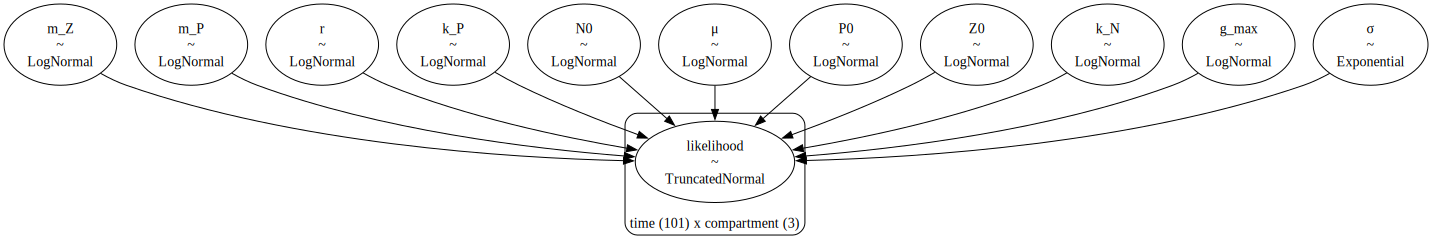

In [89]:
npz_model_pymc.to_graphviz()

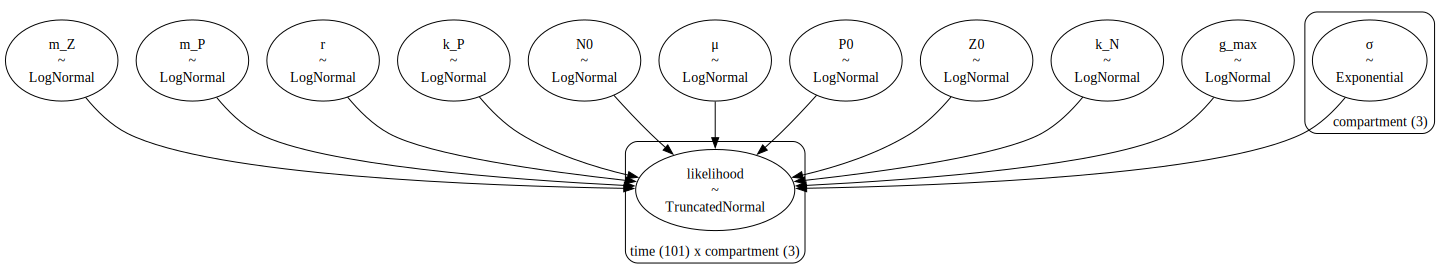

In [97]:
npz_model_pymc_hetero.to_graphviz()

Below is an example of what the priors look like; in this case μ, the maximum N uptake rate.

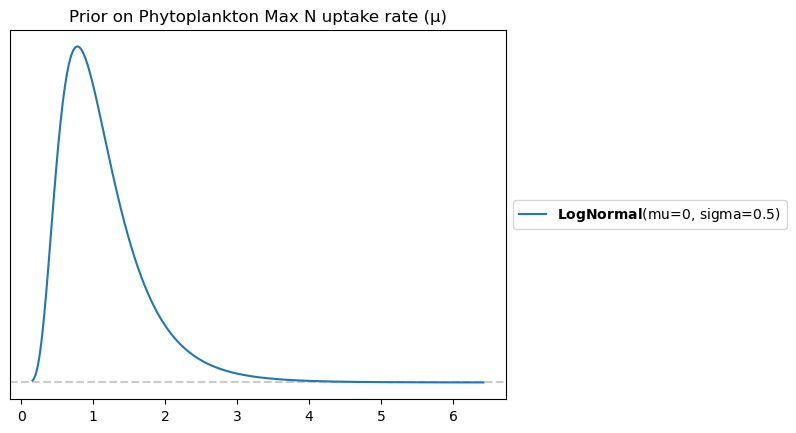

In [108]:
f, ax = pp.subplots()
pz.distributions.LogNormal(mu=0, sigma=0.5).plot_pdf(ax=ax)
ax.set_title('Prior on Phytoplankton Max N uptake rate (μ)');

#### Prior Predictive Checks

Before fitting the model to data, the Bayesian workflow  perform **prior predictive checks**. This involves simulating NPZ time-series data by sampling from the prior distributions for all model parameters and initial conditions. The simulated trajectories for nutrients, phytoplankton, and zooplankton are then compared with ecological expectations. By this I mean reasonable growth rates and steady-state biomass levels, albeit with pretty large uncertainties given the model that has not been fit to the data yet. If the simulated outputs fall outside plausible ranges (such as unrealistically high or low biomass), the priors are re-evaluated and adjusted accordingly. This step is crucial to ensure that  model assumptions and specified priors yield biologically realistic behavior even before observing any data. Moreover, this step exposes choices for better scrutiny and critique that can contribute to making better models.


In [90]:
with npz_model_pymc:
    idata = pm.sample_prior_predictive(draws=500)

Sampling: [N0, P0, Z0, g_max, k_N, k_P, likelihood, m_P, m_Z, r, μ, σ]


In [91]:
idata

Inference data with groups:
	> prior

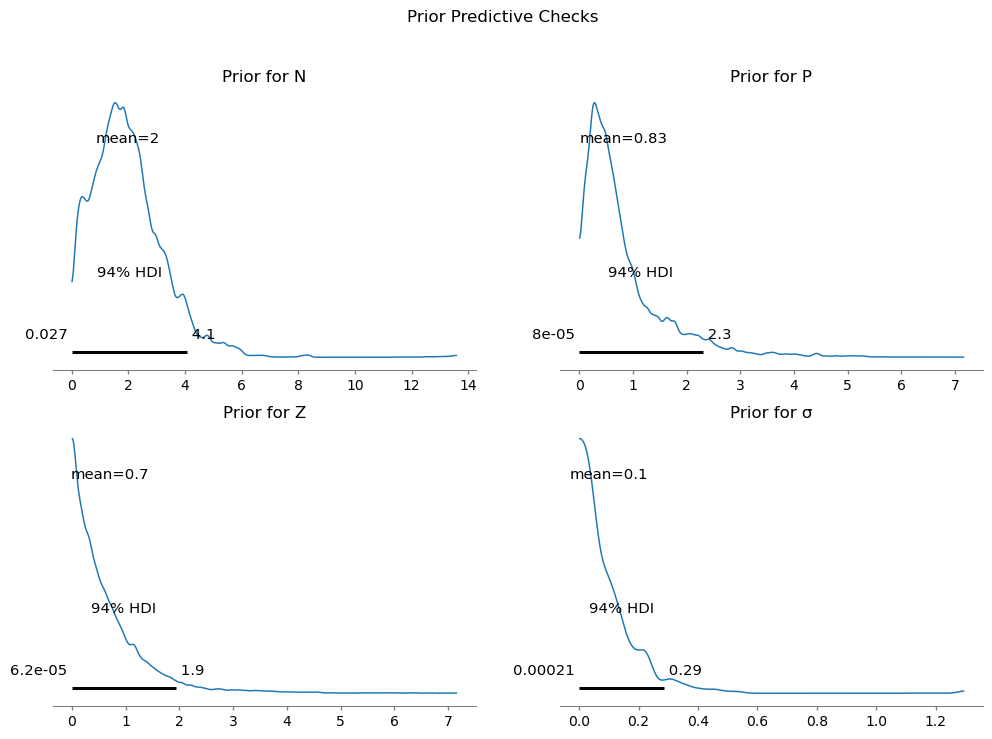

In [143]:
f, axs = pp.subplots(ncols=2, nrows=2, figsize=(12, 8))
az.plot_posterior(idata, group='prior', var_names='likelihood', combine_dims={'chain', 'draw', 'time'}, ax=axs.ravel()[:3], textsize=10)
for ax, comp in zip(axs.ravel()[:3], ['N', 'P', 'Z']):
    ax.set_title(f'Prior for {comp}', fontsize=12)
ax= axs.ravel()[-1]
az.plot_posterior(idata, group='prior', var_names='σ', ax=ax, textsize=10);
ax.set_title(f'Prior for {σ}', fontsize=12)
f.suptitle('Prior Predictive Checks');

Next is to try to examine the prior predictive checks as time series by time-wise unrolling the priors on N, P, Z plotted above.

In [94]:
likelihood = idata.prior['likelihood'].to_numpy()
# Compute summary statistics across the draws:
lkl_mean   = np.mean(likelihood.squeeze(), axis=0)      # shape: (time, 3)
lkl_median = np.median(likelihood.squeeze(), axis=0)      # shape: (time, 3)
lkl_hdi = az.hdi(likelihood, )

In [155]:
compartment_colors= ['black', 'green', 'purple']

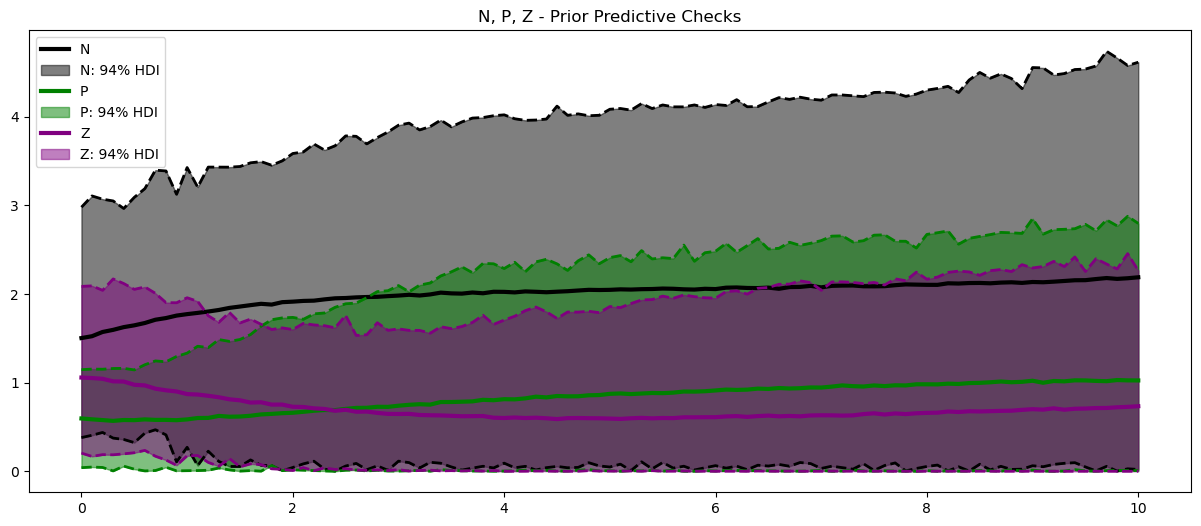

In [156]:
f, ax = pp.subplots(figsize = (15, 6))
for i, (comp, color) in enumerate(zip(compartment, compartment_colors)):
    ax.plot(t, lkl_mean[:, i], label=comp, color=color, lw=3)
    ax.plot(t,lkl_hdi[:,i,0], color=color, ls='--', lw=2)
    ax.plot(t,lkl_hdi[:,i,1], color=color, ls='--', lw=2)
    ax.fill_between(t, y1=lkl_hdi[:,i,0], y2=lkl_hdi[:,i,1], alpha=0.5, color=color, label=f'{comp}: 94% HDI', )
ax.legend()
ax.set_title('N, P, Z - Prior Predictive Checks');

Repeating Prior Predictive Checks for the model with compartment-wise heteroscedasticity. 

In [136]:
with npz_model_pymc_hetero:
    idata_hetero = pm.sample_prior_predictive(draws=500)

Sampling: [N0, P0, Z0, g_max, k_N, k_P, likelihood, m_P, m_Z, r, μ, σ]


In [138]:
idata_hetero

Inference data with groups:
	> prior

Note that σ has now a "compartment" (N, P, Z) dimension

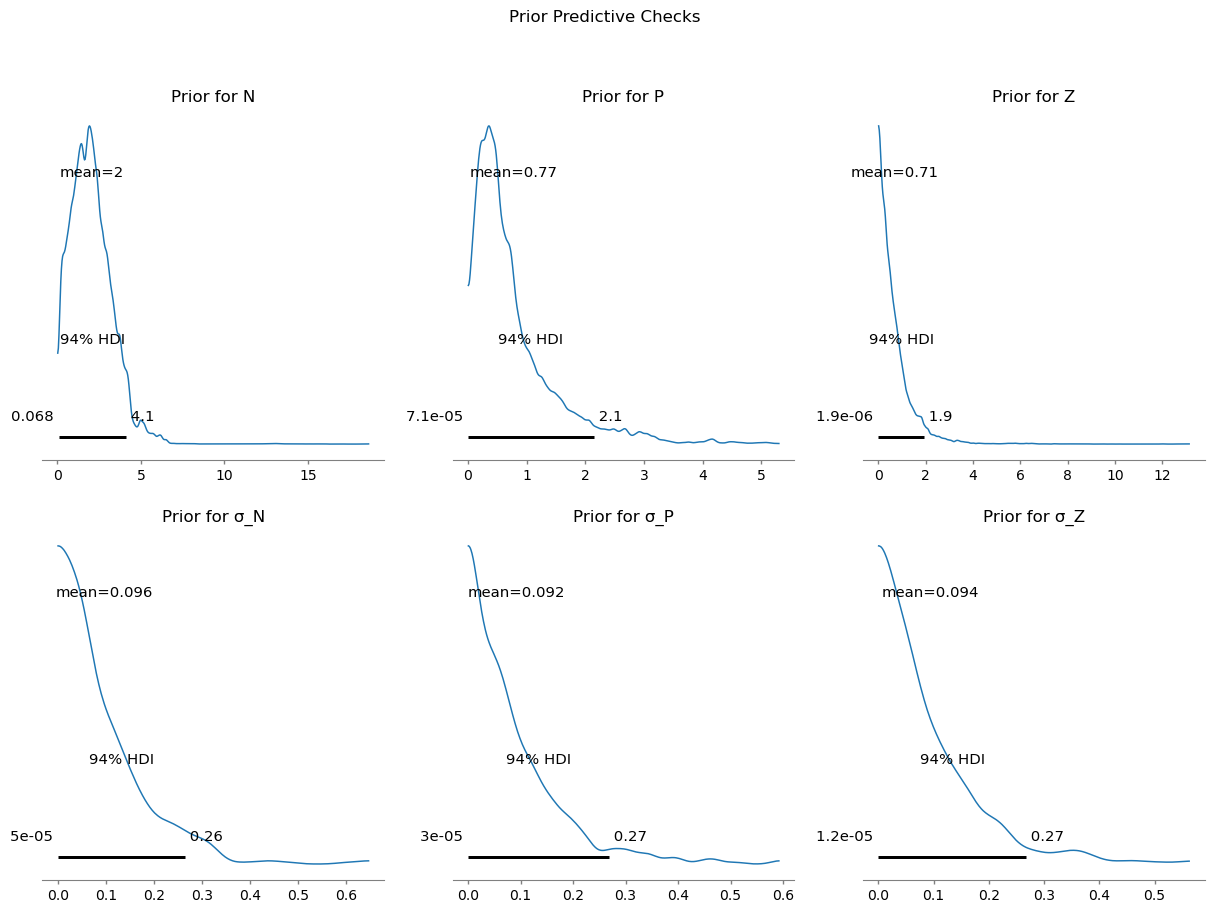

In [144]:
f, axs = pp.subplots(ncols=3, nrows=2, figsize=(15, 10))
az.plot_posterior(idata_hetero, group='prior', var_names='likelihood', combine_dims={'chain', 'draw', 'time'}, ax=axs.ravel()[:3], textsize=10)
for ax, comp in zip(axs.ravel()[:3], ['N', 'P', 'Z']):
    ax.set_title(f'Prior for {comp}', fontsize=12)
#ax= axs.ravel()[-1]
az.plot_posterior(idata_hetero, group='prior', var_names='σ', ax=axs.ravel()[3:], textsize=10);
for ax, comp in zip(axs.ravel()[3:], ['N', 'P', 'Z']):
    ax.set_title(f'Prior for σ_{comp}', fontsize=12)
#ax.set_title(f'Prior for {σ}', fontsize=12)
f.suptitle('Prior Predictive Checks');

### 3. Fitting Model with Synthetic Data

#### Creating synthetic data

Sampling the prior indicates the model is behaving reasonably estimates. Now I will simulate synthetic data with coefficients taken from the litterature. 
The code below sets up and runs the forward (npz) model to get time series of N, P, Z. The goal will be to recover the model parameters by fitting the above models to this data.

In [ ]:
def simulate_npz(t, y0, params):
    """
    Solves the NPZ ODE system with given initial conditions and parameters.
    
    Parameters
    ----------
    t : array-like
        Time vector.
    y0 : array-like
        Initial conditions [N0, P0, Z0].
    params : array-like
        Model parameters.
    
    Returns
    -------
    ndarray
        Simulated trajectory (shape: [len(t), 3]).
    """
    sol = solve_ivp(lambda t, y: npz_model(y, t, params), [t[0], t[-1]], y0, t_eval=t)
    return sol.y.T  # Transpose so that shape is (time, compartments)


# True initial conditions
y0_true = [1.0, 0.5, 0.2]  # [N0, P0, Z0]

In [100]:
# Literature-informed "true" parameter values (Franks et al. 1986 and similar studies)
true_params = [
    1.0,   # mu: Maximum nutrient uptake rate (day^-1)
    0.5,   # k_N: Half-saturation constant for nutrient uptake (mM N)
    2.0,   # g_max: Maximum grazing rate (day^-1)
    1.0,   # k_P: Half-saturation constant for grazing (relative units)
    0.2,   # m_P: Phytoplankton mortality rate (day^-1)
    0.3,   # m_Z: Zooplankton mortality rate (day^-1)
    0.8   # r: Conversion efficiency (dimensionless)
]
# Generate synthetic (deterministic) data
synthetic_data = simulate_npz(t, y0_true, true_params)


In [101]:
# Add noise to mimic observational uncertainty
np.random.seed(42)
noise_level = 0.05  # Standard deviation of noise
synthetic_obs = synthetic_data + np.random.normal(0, noise_level, synthetic_data.shape)
synthetic_obs = np.clip(synthetic_obs, 1e-3, None)  # Ensure strictly positive values


In [152]:
# Organize the synthetic observational data in a dataframe:
df = pd.DataFrame(
    {
        'time': t,
        'N': synthetic_obs[:, 0],
        'P': synthetic_obs[:, 1],
        'Z': synthetic_obs[:, 2]
        }
)
df.set_index('time', inplace=True)

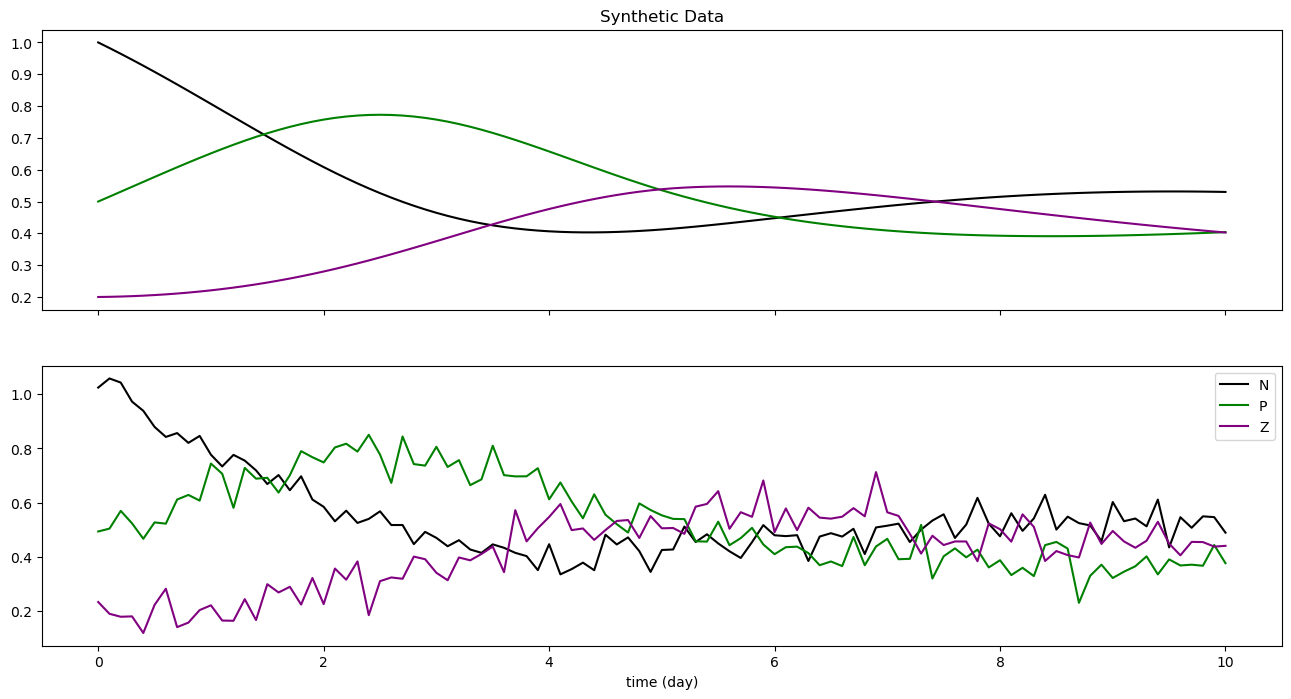

In [161]:
f, axs = pp.subplots(nrows=2, figsize=(16, 8), sharex=True)
for i, comp in enumerate(compartment):
    axs[0].plot(t, synthetic_data[:, i], label=comp, color=compartment_colors[i])
    axs[0].set_title('Synthetic Data', fontsize=12)
df.plot.line(color=compartment_colors, ax=axs[1])
axs[1].set_xlabel('time (day)');


#### Fitting the model(s)
I add a likelihood that takes in data

In [ ]:
with pm.Model(coords=COORDS) as npz_model_pymc:
    # Priors for model parameters (cf. Table 1)
    μ = pm.LogNormal('μ', mu=0.0, sigma=0.5) # Max N uptake rate
    k_N= pm.LogNormal('k_N', mu=-0.3, sigma=0.4) # Half-Saturation constant for nutrient uptake
    g_max = pm.LogNormal('g_max', mu=0, sigma=0.5) # Max grazing rate
    k_P = pm.LogNormal('k_P', mu=0, sigma=0.4, ) # Half saturation constant
    m_P = pm.LogNormal('m_P', mu=-1, sigma=0.3) # Phytoplankton mortality rate
    m_Z = pm.LogNormal('m_Z', mu=-0.7, sigma=0.3) # Zooplankton mortality rate
    r = pm.LogNormal('r', mu=0.25, sigma=0.2) # Conversion efficiency of grazed P into Z

    # Priors for initial conditions
    N0 = pm.LogNormal("N0", mu=0.3, sigma=0.5) # Initial nutrient concentration
    P0 = pm.LogNormal("P0", mu=-0.7, sigma=0.5) # Initial phytoplanton biomass
    Z0 = pm.LogNormal("Z0", mu=-0.1, sigma=0.5) # Initial zooplankton biomass
    
    # Other 
    σ = pm.Exponential('σ', 10) # model variance

    # Pack parameters into a tensor
    θ = pt.stack([μ, k_N, g_max, k_P, m_P, m_Z, r])
    # Pack initial conditions into a tensor
    y0 = pt.stack([N0, P0, Z0])

    npz_solution = npz_model_ode(y0=y0, theta=θ)
    pm.TruncatedNormal('likelihood', mu=npz_solution, sigma=σ, lower=1e-6, observed=df[['N', 'P', 'Z']].values, dims=['time', 'compartment'])



In [174]:
with npz_model_pymc:
    idata= pm.sample_prior_predictive(draws=500)
    

Sampling: [N0, P0, Z0, g_max, k_N, k_P, likelihood, m_P, m_Z, r, μ, σ]


In [180]:
with npz_model_pymc:
    idata.extend(pm.sample(chains=2, draws=1000))

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [μ, k_N, g_max, k_P, m_P, m_Z, r, N0, P0, Z0, σ]


Output()

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pymc/ode/ode.py:133: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  sol = scipy.integrate.odeint(


/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pymc/ode/ode.py:133: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = scipy.integrate.odeint(


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.1000000000000D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2000000000000D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.2000000000000D+00


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4834 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [181]:
with npz_model_pymc:
    idata.extend(pm.sample_posterior_predictive(idata))

Sampling: [likelihood]


Output()

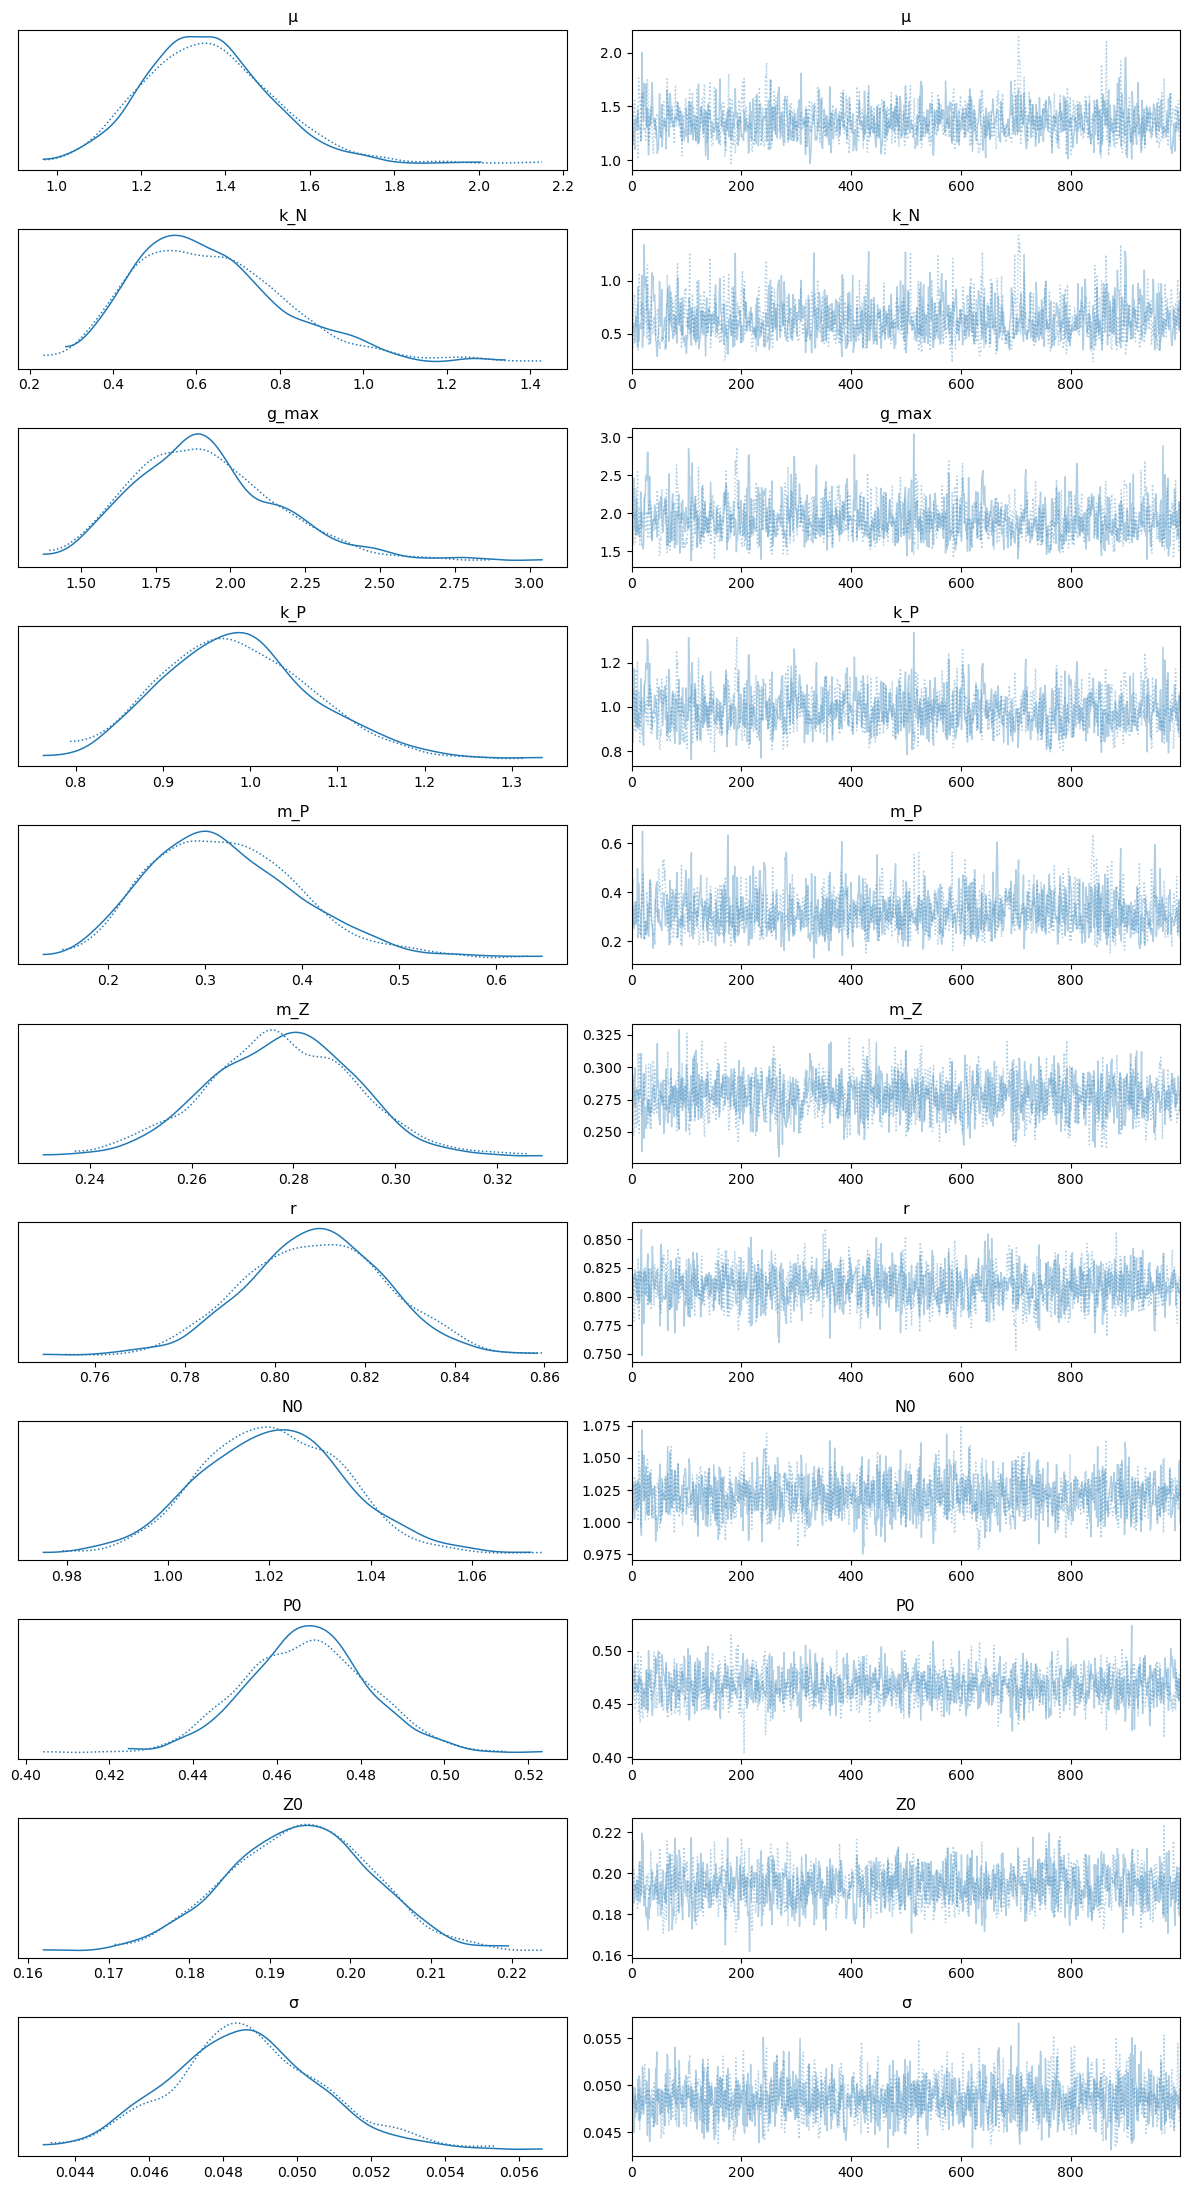

In [184]:
axes = az.plot_trace(idata, backend_kwargs=dict(tight_layout=True))

In [ ]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,1.359,0.152,1.098,1.653,0.004,0.003,1215.0,1267.0,1.0
k_N,0.634,0.182,0.344,0.985,0.005,0.004,1064.0,1182.0,1.0
g_max,1.919,0.243,1.483,2.354,0.007,0.005,1157.0,956.0,1.0
k_P,0.986,0.087,0.827,1.147,0.003,0.002,1146.0,1102.0,1.0
m_P,0.321,0.078,0.179,0.459,0.002,0.002,1436.0,1107.0,1.0
m_Z,0.278,0.015,0.249,0.303,0.000,0.000,1469.0,1197.0,1.0
r,0.809,0.016,0.781,0.839,0.000,0.000,1537.0,1223.0,1.0
N0,1.021,0.014,0.993,1.045,0.000,0.000,1481.0,1284.0,1.0
P0,0.467,0.015,0.441,0.495,0.000,0.000,1368.0,1301.0,1.0
Z0,0.194,0.009,0.177,0.209,0.000,0.000,1256.0,1346.0,1.0


In [ ]:
param_names = ['μ', 'k_N', 'g_max', 'k_P', 'm_P', 'm_Z', 'r']

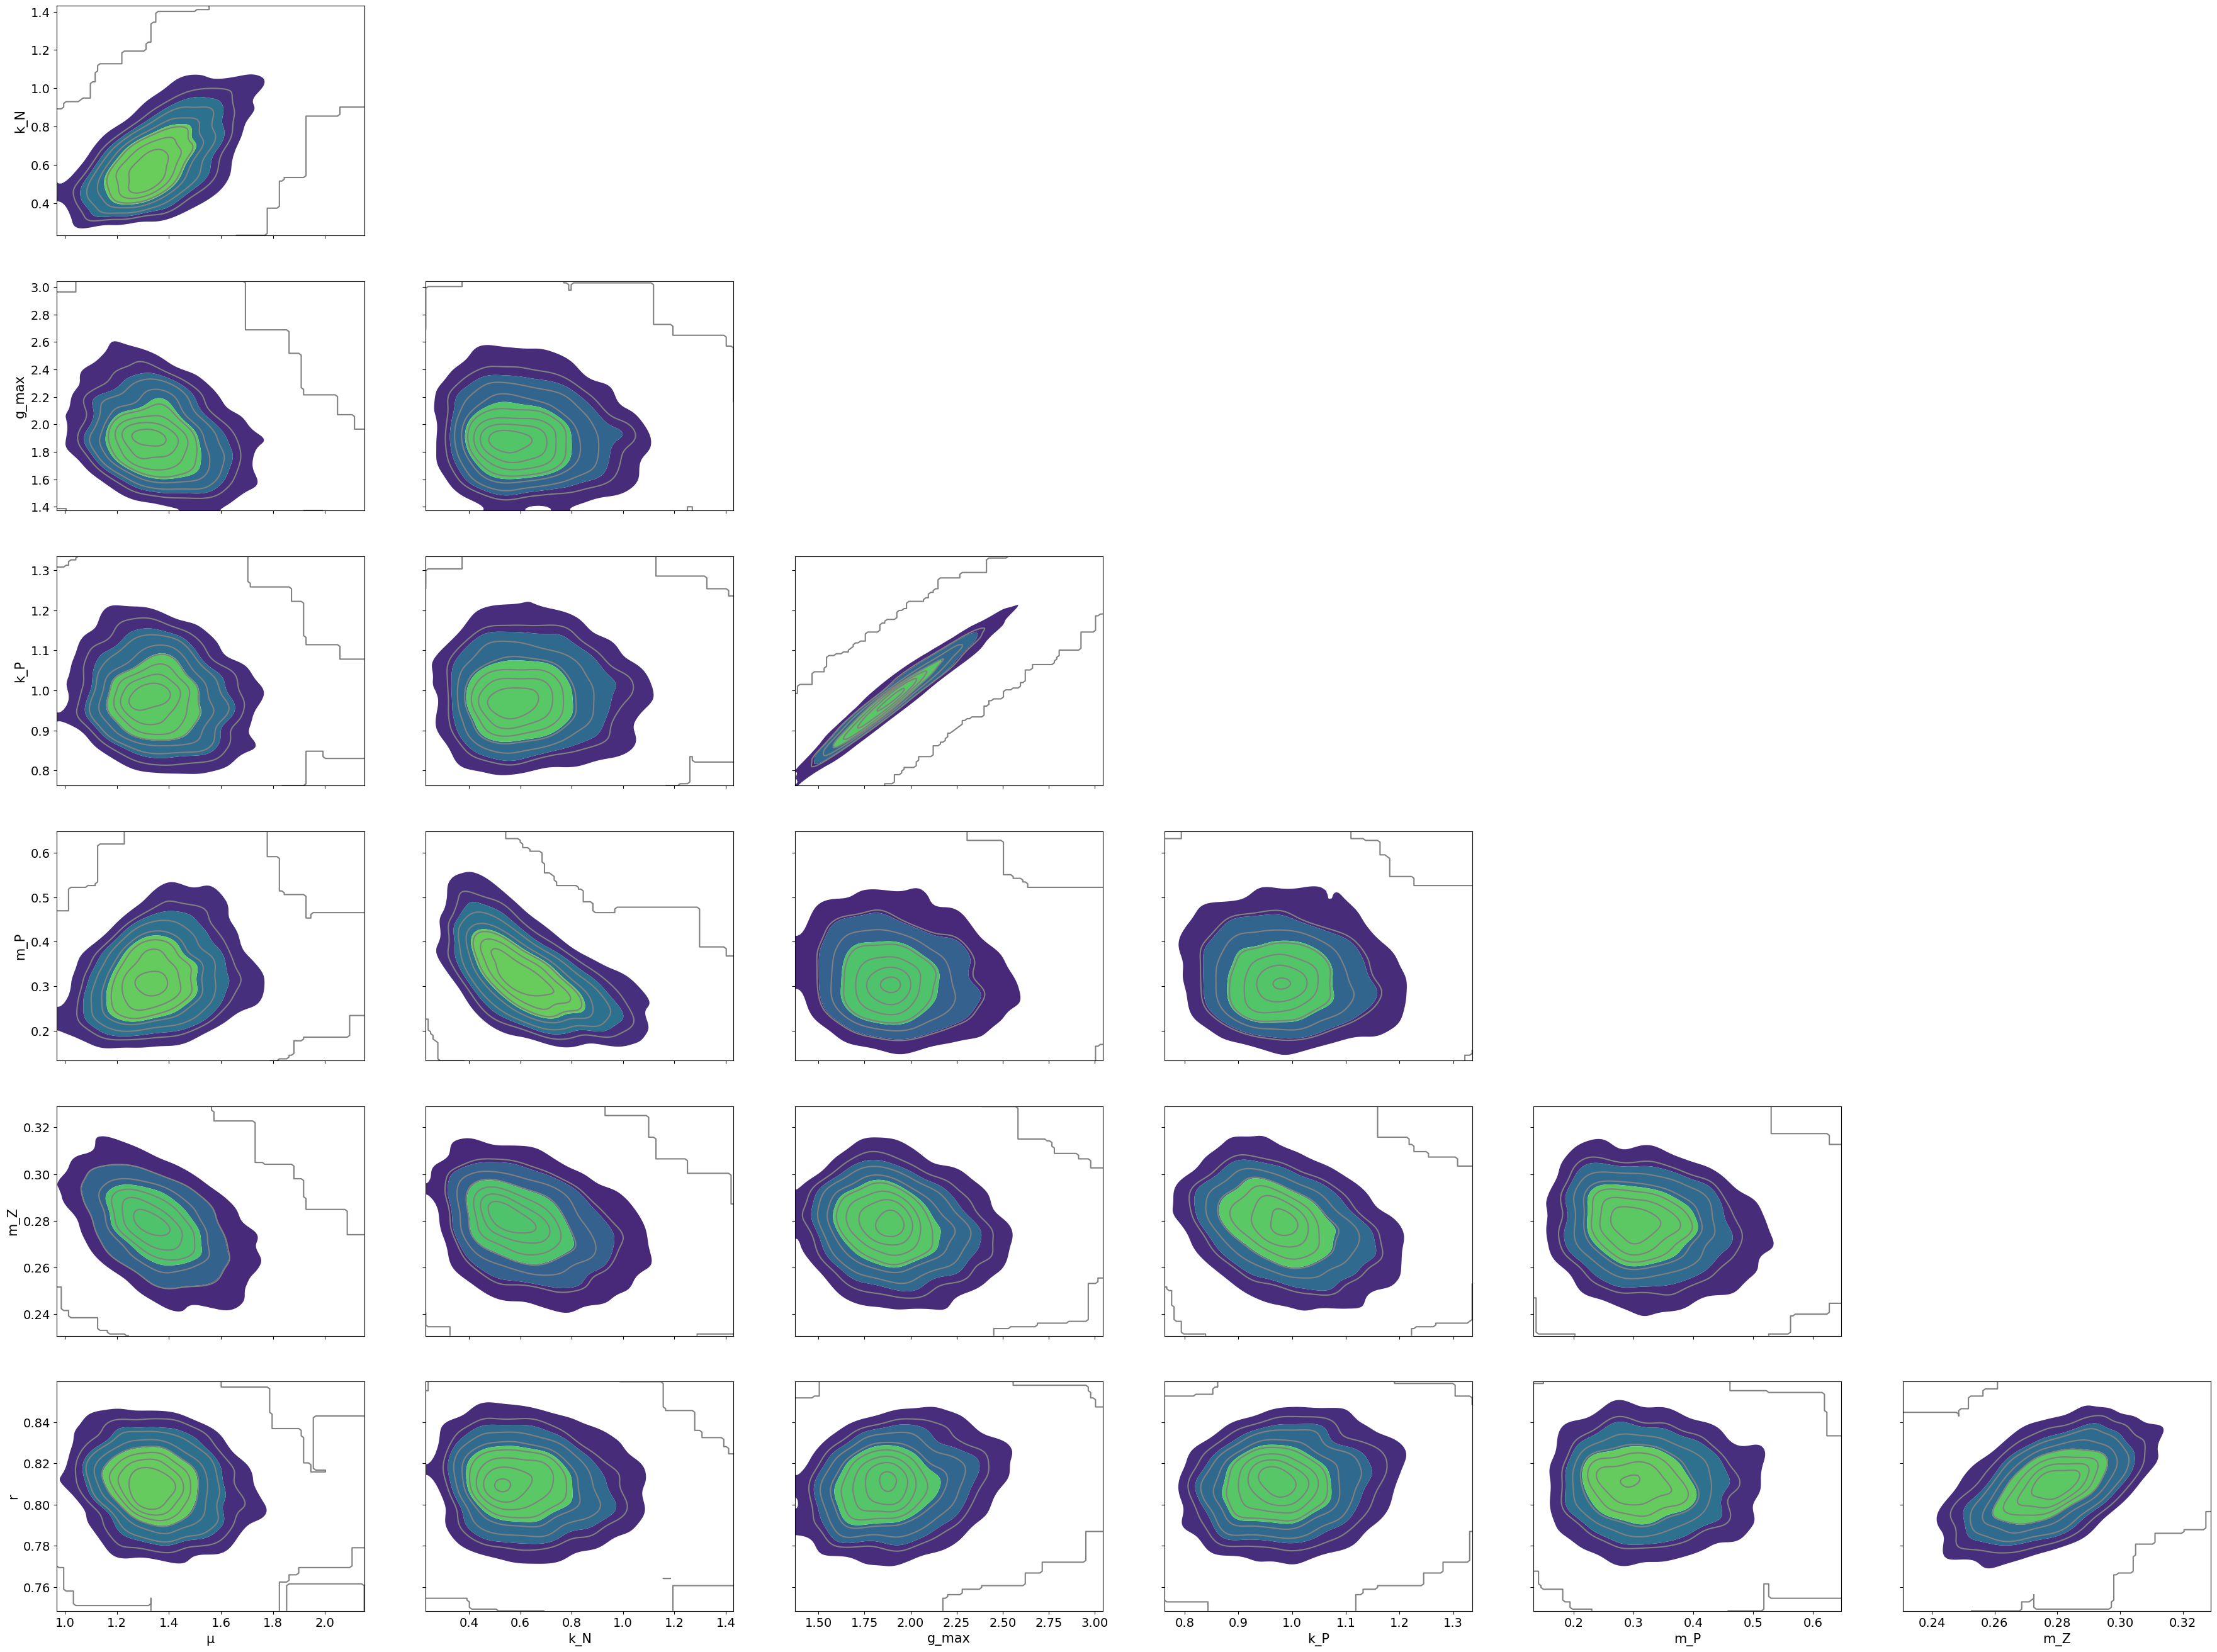

In [201]:
az.plot_pair(idata, kind='kde', var_names=param_names);

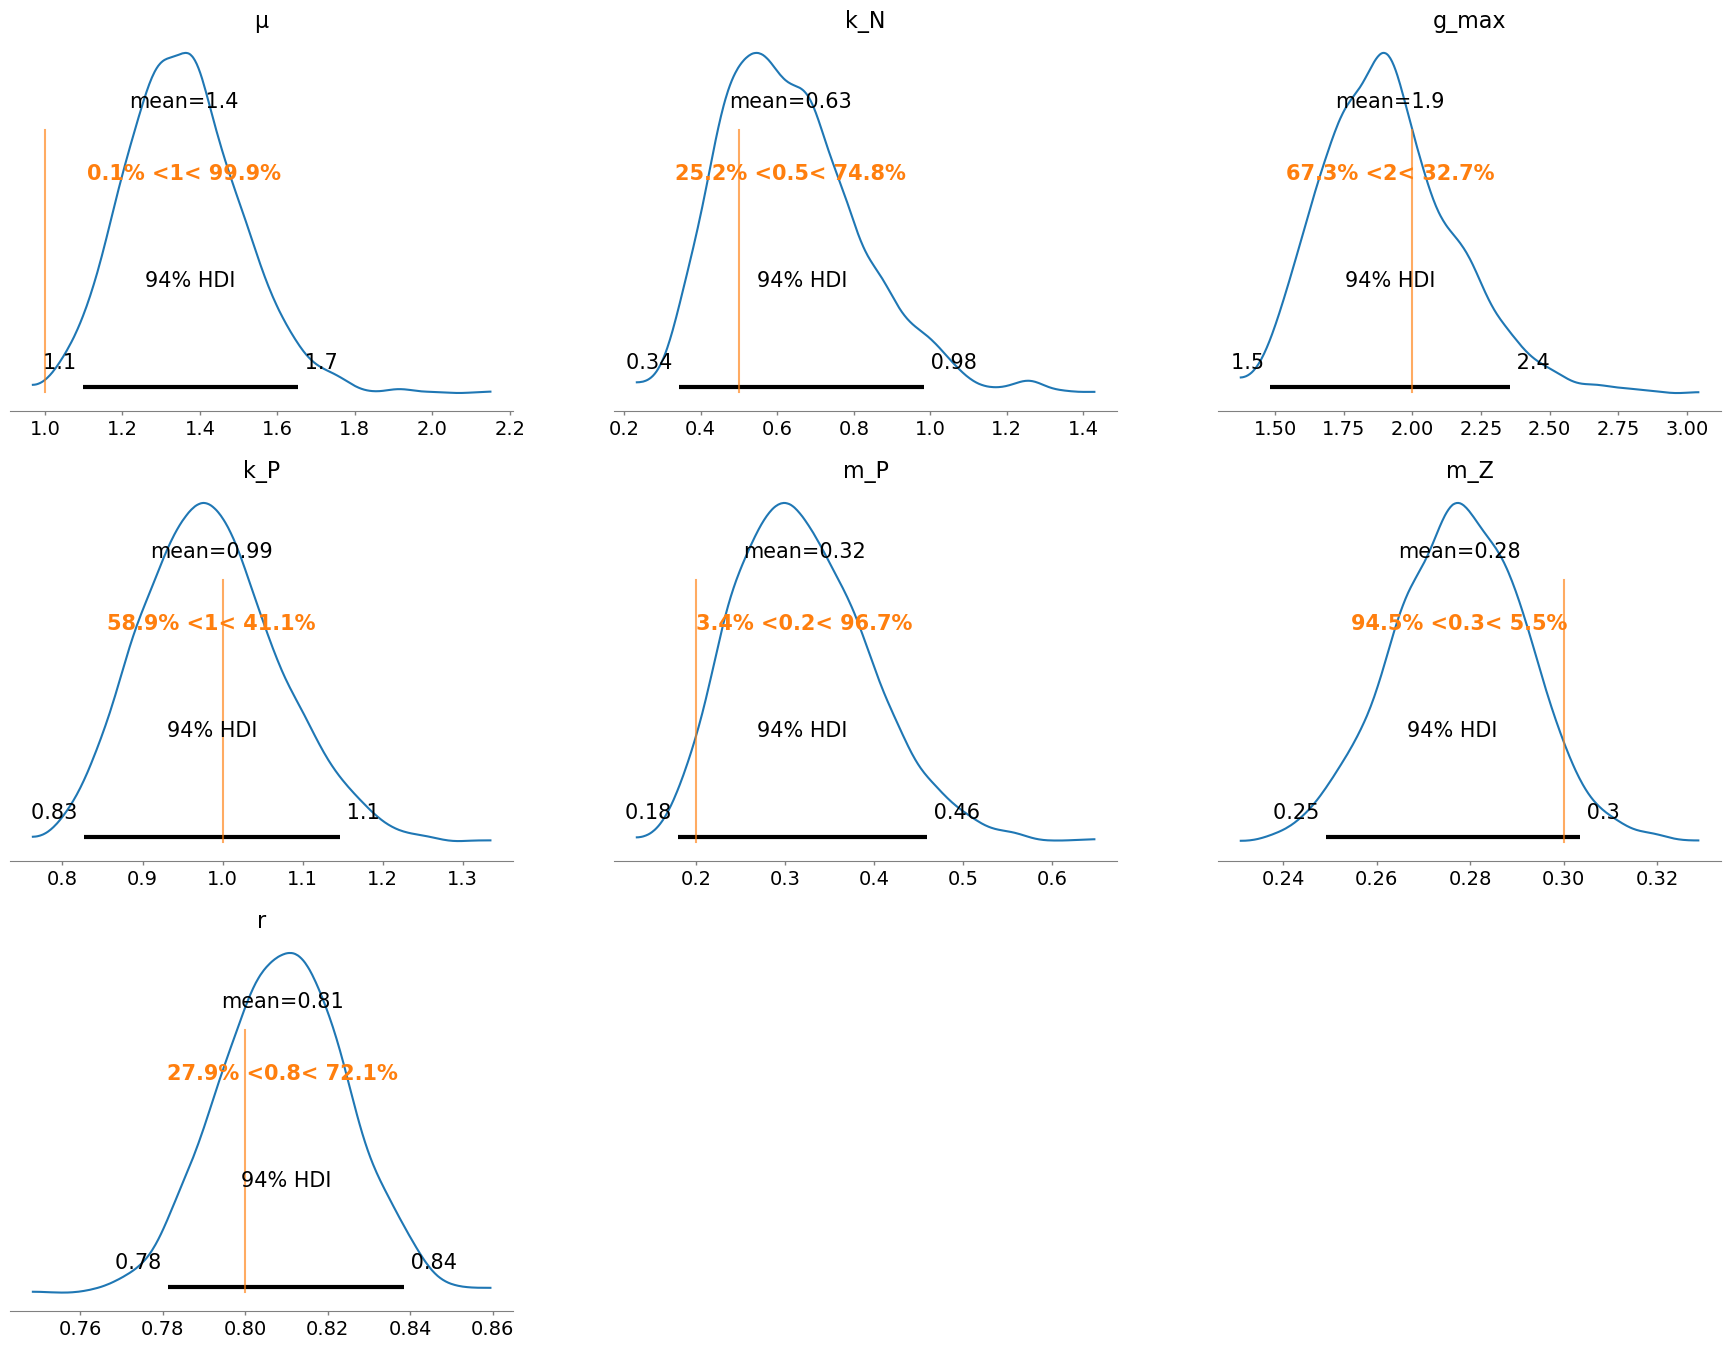

In [196]:
az.plot_posterior(idata, var_names=param_names, ref_val=true_params);

In [ ]:
with npz_model_pymc:
    idata_2= pm.sample_prior_predictive(draws=500)
    

In [ ]:
with npz_model_pymc:
    idata_2.extend(pm.sample(chains=2, draws=1000))
    idata_2.extend(pm.sample_posterior_predictive(idata_2))